A simple plot to illustrate the difference between glider L1 and L2 data.

In [2]:
import alborexdata
import alborexpaths
from alborexpaths import coordinates1, coordinates2
import netCDF4
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime

importing configuration from alborexpaths


## Read data
L1 and L2 corresponding to the same glider.

In [3]:
GliderL1 = alborexdata.Glider()
GliderL2 = alborexdata.Glider()

In [4]:
GliderL1.get_from_netcdf(alborexpaths.gliderfiles[0])
GliderL2.get_from_netcdf(alborexpaths.gliderfilesL2[0])

### Subset the profiles

In [5]:
startdate = datetime.datetime(2014, 5, 26, 18, 0, 0)
enddate = datetime.datetime(2014, 5, 27, 0, 0, 0)
gooddates1 = np.where( (GliderL1.dates <= enddate) & (GliderL1.dates >= startdate))[0]
gooddates2 = np.where( (GliderL2.dates <= enddate) & (GliderL2.dates >= startdate))[0]

## Make plot

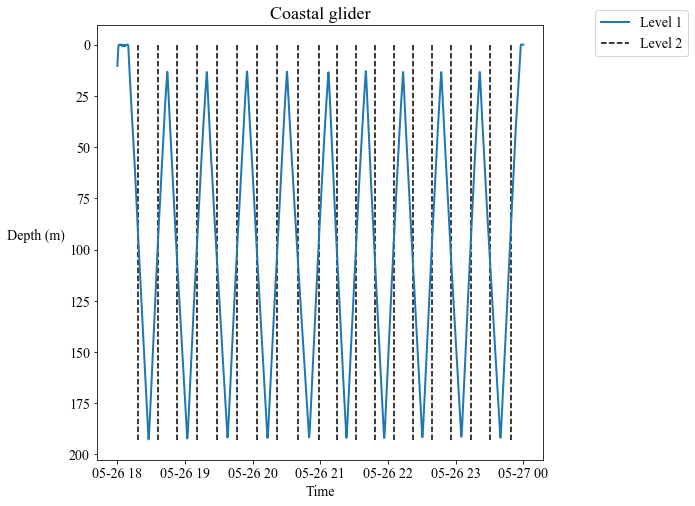

In [9]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 8))
plt.vlines(GliderL2.dates[gooddates2], ymin=GliderL2.depth.min(), ymax=GliderL2.depth.max(), 
           linestyle="--", label="Level 2", zorder=1)
plt.plot(GliderL1.dates[gooddates1], GliderL1.depth[gooddates1], lw=2, 
         label="Level 1",zorder=2)
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.1, 1.05), fontsize=14)
plt.ylabel("Depth (m)", fontsize=14, rotation=0, ha="right")
plt.xlabel("Time", fontsize=14)
plt.title("Coastal glider", fontsize=18)
plt.savefig(os.path.join(alborexpaths.figdir, "gliderL1L2.png"), dpi=300, 
            edgecolor='w',transparent=False, 
            bbox_inches='tight', pad_inches=0.)
plt.show()
plt.close()